<a href="https://colab.research.google.com/github/zaghluldinilhaq/Exception/blob/main/pratikum_terakhir_clustering__(K_mens_Hierarchical_asosisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('country_health_indicators_v3.csv')
data.head()

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,NaN,NaN,-5.0,89.0,80,NaN,NaN


In [ ]:
data.info()
missing_values = data.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             180 non-null    object 
 1   first_1ConfirmedCases                      180 non-null    object 
 2   first_1Fatalities                          133 non-null    object 
 3   first_10ConfirmedCases                     153 non-null    object 
 4   first_50ConfirmedCases                     121 non-null    object 
 5   first_100ConfirmedCases                    112 non-null    object 
 6   cases_growth                               180 non-null    float64
 7   death_growth                               130 non-null    float64
 8   Cardiovascular diseases (%)                165 non-null    float64
 9   Cancers (%)                                165 non-null    float64
 10  Diabetes, blood, & endocri

Country_Region             0
first_1ConfirmedCases      0
first_1Fatalities         47
first_10ConfirmedCases    27
first_50ConfirmedCases    59
                          ..
school_shutdown_1death    61
FF_DayOfYear              47
case1_DayOfYear            0
case10_DayOfYear          27
case50_DayOfYear          59
Length: 70, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk K-Means Clustering: 0.1908456248460404


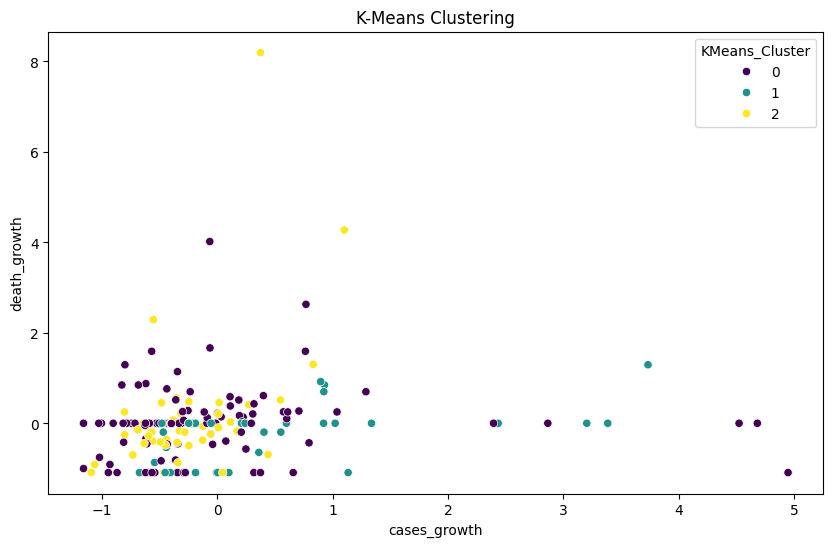

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

features = data.select_dtypes(include=[int, float])

features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
data['KMeans_Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f'Silhouette Score untuk K-Means Clustering: {silhouette_avg}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.show()

Silhouette Score untuk Hierarchical Clustering: 0.16749337375325618


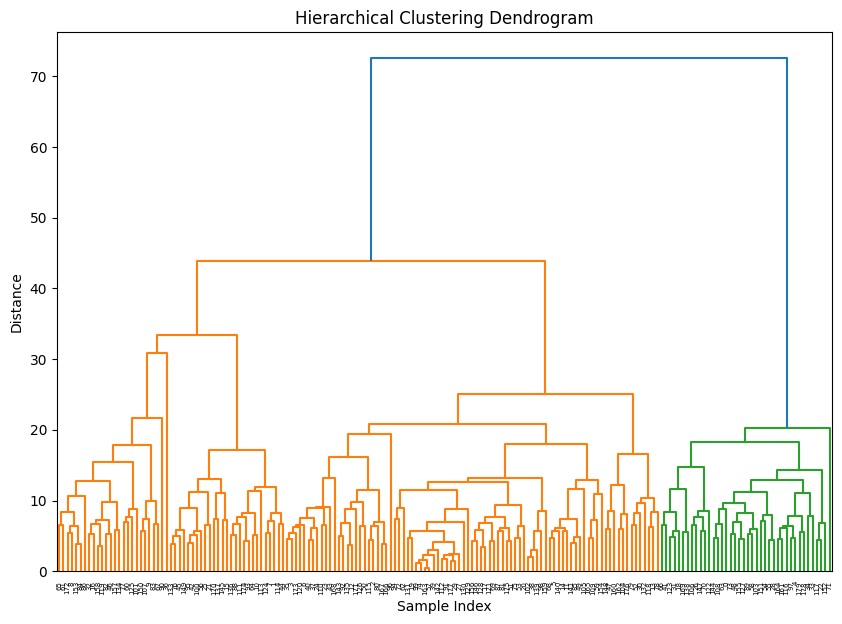

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

linked = linkage(features_scaled, method='ward')

hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')

silhouette_avg = silhouette_score(features_scaled, hierarchical_clusters)
print(f'Silhouette Score untuk Hierarchical Clustering: {silhouette_avg}')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

  Country_Region first_1ConfirmedCases first_1Fatalities  \
0    Afghanistan            2020-02-24        2020-03-22   
1        Albania            2020-03-09        2020-03-11   
2        Algeria            2020-02-25        2020-03-12   
3        Andorra            2020-03-02        2020-03-22   
4         Angola            2020-03-20        2020-03-29   

  first_10ConfirmedCases first_50ConfirmedCases first_100ConfirmedCases  \
0             2020-03-14             2020-03-24              2020-03-27   
1             2020-03-10             2020-03-16              2020-03-23   
2             2020-03-04             2020-03-16              2020-03-21   
3             2020-03-17             2020-03-19              2020-03-22   
4                    NaN                    NaN                     NaN   

   cases_growth  death_growth  Cardiovascular diseases (%)  Cancers (%)  ...  \
0      0.174179      0.083333                     8.953006     3.372082  ...   
1      0.068699      0.13005

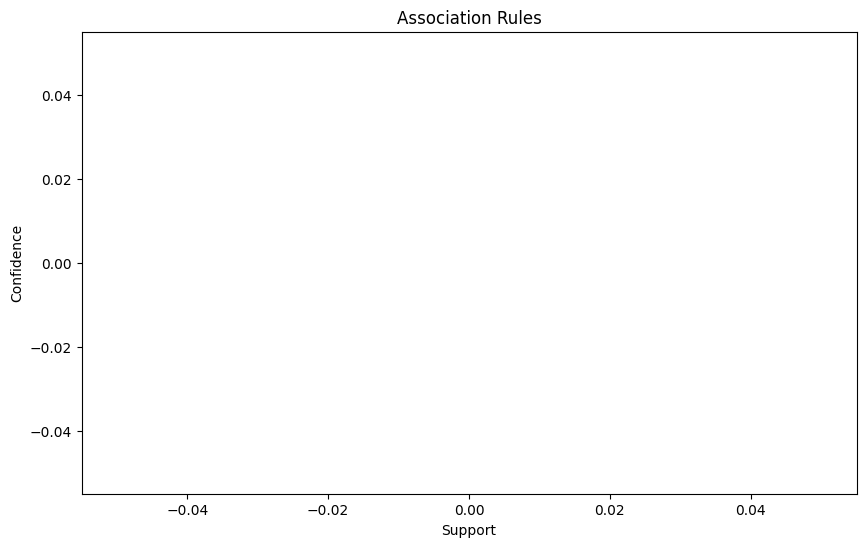

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

data = pd.read_csv('country_health_indicators_v3.csv')
print(data.head())

categorical_features = data.select_dtypes(include=[object])

binary_data = pd.get_dummies(categorical_features)

frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

print(rules.head())

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()